# IRIS - Connection II
---
![Add layer](https://github.com/DrKAI/image/blob/main/Add%20Layer.png?raw=true)

In [2]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기
* iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [3]:
iris = load_iris()

In [4]:
df_x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [5]:
df_x.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [6]:
df_x.shape, y.shape

((150, 4), (150,))

## train set, test set 구분하기

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_x, test_x, train_y, test_y =\
    train_test_split(df_x, y, random_state=2023, test_size=0.2)

In [9]:
train_x.shape, train_y.shape

((120, 4), (120,))

## **sepal끼리, petal끼리**

In [10]:
train_x.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [11]:
tr_x_se = train_x[['sepal length (cm)', 'sepal width (cm)']]
tr_x_pe = train_x[['petal length (cm)', 'petal width (cm)']]

te_x_se = test_x[['sepal length (cm)', 'sepal width (cm)']]
te_x_pe = test_x[['petal length (cm)', 'petal width (cm)']]

## One-hot Encoding

In [14]:
from tensorflow.keras.utils import to_categorical

In [16]:
class_n = len(set(train_y))

In [17]:
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

In [18]:
tr_x_se.shape, tr_x_pe.shape, train_y.shape

((120, 2), (120, 2), (120, 3))

## Modeling : multi-input & Add layer

In [19]:
# 세션 클리어
keras.backend.clear_session()

# 레이어 엮기
il_se = keras.layers.Input(shape=(2,))
il_pe = keras.layers.Input(shape=(2,))

hl_se = keras.layers.Dense(4, activation='relu', name='hl_sepal')(il_se)
hl_pe = keras.layers.Dense(4, activation='relu', name='hl_petal')(il_pe)

add_l = keras.layers.Add()([hl_se, hl_pe])
ol = keras.layers.Dense(3, activation='softmax')(add_l)

# 모델 시작 끝 지정
model = keras.models.Model([il_se, il_pe], ol)

# 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer='adam')

# 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 hl_sepal (Dense)               (None, 4)            12          ['input_1[0][0]']                
                                                                                                  
 hl_petal (Dense)               (None, 4)            12          ['input_2[0][0]']                
                                                                                              

## 모델 시각화

In [20]:
from tensorflow.keras.utils import plot_model

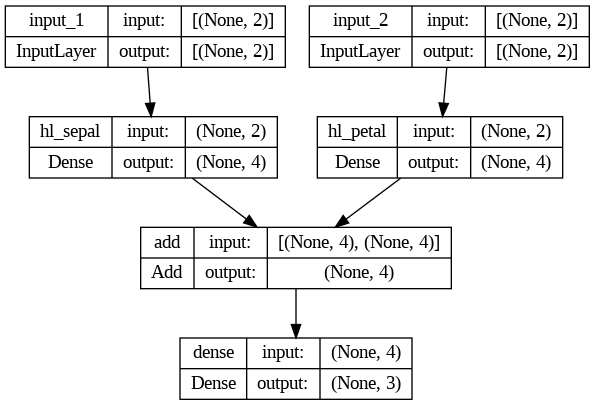

In [21]:
plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
es = EarlyStopping(monitor='val_loss',         # 관측 대상
                   min_delta=0,                # 임계값. 관측 대상이 임계값만큼 변하지 않는다면 patience 1 증가
                   patience=5,                 # 관측 대상 성능이 개선되지 않을 때 몇 번 더 지켜볼래
                   verbose=1,
                   restore_best_weights=True)  # 최적의 epoch 가중치를 모델에 적용

In [24]:
model.fit([tr_x_se, tr_x_pe], train_y, validation_split=0.2, epochs=10000, verbose=1,
          callbacks=[es])

Epoch 1/10000
3/3 [==============================] - 1s 172ms/step - loss: 3.1716 - accuracy: 0.3125 - val_loss: 2.9642 - val_accuracy: 0.3333
Epoch 2/10000
3/3 [==============================] - 0s 28ms/step - loss: 3.1151 - accuracy: 0.3125 - val_loss: 2.9096 - val_accuracy: 0.3333
Epoch 3/10000
3/3 [==============================] - 0s 29ms/step - loss: 3.0593 - accuracy: 0.3125 - val_loss: 2.8571 - val_accuracy: 0.3333
Epoch 4/10000
3/3 [==============================] - 0s 20ms/step - loss: 3.0032 - accuracy: 0.3125 - val_loss: 2.8070 - val_accuracy: 0.3333
Epoch 5/10000
3/3 [==============================] - 0s 29ms/step - loss: 2.9517 - accuracy: 0.3125 - val_loss: 2.7586 - val_accuracy: 0.3333
Epoch 6/10000
3/3 [==============================] - 0s 31ms/step - loss: 2.8993 - accuracy: 0.3125 - val_loss: 2.7120 - val_accuracy: 0.3333
Epoch 7/10000
3/3 [==============================] - 0s 20ms/step - loss: 2.8498 - accuracy: 0.3021 - val_loss: 2.6677 - val_accuracy: 0.3333
Epoch

In [25]:
y_pred = model.predict([te_x_se, te_x_pe])

1/1 [==============================] - 0s 119ms/step


In [26]:
y_pred[:5]

array([[2.5475901e-08, 6.3712057e-03, 9.9362868e-01],
       [2.1206760e-03, 9.4882989e-01, 4.9049422e-02],
       [3.0331789e-03, 9.7118902e-01, 2.5777847e-02],
       [3.3349244e-07, 5.6130506e-02, 9.4386911e-01],
       [3.6866858e-04, 7.7578521e-01, 2.2384606e-01]], dtype=float32)

In [27]:
test_y[:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)